<a href="https://colab.research.google.com/github/dSudario9/Modelos-Supervisionados-Diversos/blob/main/SVM_com_Scikit_learn_na_Pratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Modelo SVM na pratica. 
 
 #IMPORT BIBLIOTECAS.  

from sklearn import datasets
import pandas as pd

In [ ]:
# Importar DataSet
iris = datasets.load_iris()

#iris_df = pd.read_csv('/content/iris.csv')

In [ ]:
# Organizando DataFrame 

iris_df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
iris_df['target'] = iris['target']
iris_df["target_name"] = pd.Categorical.from_codes(iris_df["target"], iris["target_names"])


In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
# Plotando graficos e vizualizando distribuição das  variaveis 

import plotly.express as px

fig = px.scatter_3d(iris_df, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)',
              color='target_name')
fig.show()

Criando Modelo Classificador  SVC
**texto em negrito**

In [ ]:
# Import da Biblioteca e Modelo
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
#Definindo  Preditores 

X = iris_df.drop(columns=["target_name", "target"])
Y = iris_df[["target"]]

In [ ]:
#Separando Modelo em Train e test 30% DO DATASET 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

In [ ]:
# Conferindo o tamanho da distribuição 105 PARA Train e 45 para test 
print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (105, 4)
Shape y_train: (105, 1)
Shape X_test: (45, 4)
Shape y_test: (45, 1)


In [ ]:
# Classificador 

clf = SVC(kernel='poly', decision_function_shape='ovo')

**Trainando Modelo **

In [ ]:

clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predição 
y_pred = clf.predict(X_test)

**Acurácia**

In [ ]:

from sklearn.metrics import accuracy_score

print(f"Acurácia: {accuracy_score(y_test, y_pred)*100}%")

Acurácia: 93.33333333333333%


Como podemos ver o Modelo consegiu um otimo resultado com Acurácia: 93.33333333333333%

***Agora vamos teste com um DataSet de maior dimensão ***

In [ ]:
#Aqui vamos fazer um import da base juntamente com a manipulação para vizualizar o DataFramer 

# SVM apra base de cancer

#Import base. 
breast_cancer = datasets.load_breast_cancer()

#Manipulação da base 
breast_cancer_df = pd.DataFrame(breast_cancer["data"], columns=breast_cancer["feature_names"])
breast_cancer_df['target'] = breast_cancer['target']
breast_cancer_df["target_name"] = pd.Categorical.from_codes(breast_cancer_df["target"], breast_cancer["target_names"])

#Renomear Coluna
breast_cancer_df.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)

#Vizualizar Coluna
breast_cancer_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target,target_name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [ ]:
# Excluindo dados nao necessarios. 

X = breast_cancer_df.drop(columns=["target_name", "target"])
Y = breast_cancer_df[["target"]]

***Separando base de Train e test que será usado 20% ***

In [ ]:
#Separando base. 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [ ]:
# Normalizando base de entrada  e import da biblioteca  MinMaxScaler
from sklearn.preprocessing import  MinMaxScaler   # Funação para fazer normalização. 
min_max_scaler = MinMaxScaler()

#Parametro de normalização
min_max_scaler.fit(X_train)

#Dados para normalizar entre 0 e 1 . 
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

# Essa função faz com que as variaveis que estão começando com valores decimais ex. 0.01  possam ser norvalizados e botando todos dentro da mesma escalada 
#para que possa normalizar .


**Treinando Modelo .**

In [ ]:
#Classificador 
clf = SVC(kernel='poly', decision_function_shape='ovo')

#Trainando modelo. 
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf.predict(X_test)
print(f"Acurácia: {accuracy_score(y_test, y_pred)*100}%")


Acurácia: 98.24561403508771%


Comprando com os  outros algoritimos podemos ver que este modelo  está dentro da media de Acurácia.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def make_meshgrid(x, y, h=.02):
    """"Crie uma malha de pontos para traçar

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """plot os limites de decisão para um classificador.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [ ]:
# import Dataset
iris = datasets.load_iris()
# Veja os dois primeiros recursos. Poderíamos evitar isso usando um conjunto de dados de duas dimensões
X = iris.data[:, :2]
y = iris.target

In [ ]:
C = 1.0  # Parâmetro de regularização SVM
models = (SVC(kernel='linear', C=C),
          SVC(kernel='rbf', gamma=0.7, C=C),
          SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

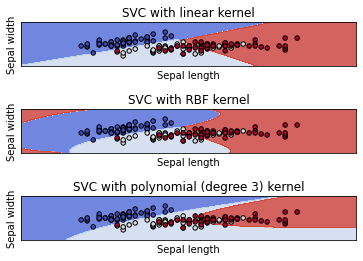

In [ ]:

# título para os plots
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Configure a grade 2x2 para plotagem.
fig, sub = plt.subplots(3, 1)
plt.subplots_adjust(wspace=1, hspace=1)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()